In [1]:
import warnings 
import bootcamp_utils

In [3]:
%load_ext blackcellmagic

In [4]:
my_list = [1, 2, 3

SyntaxError: unexpected EOF while parsing (<ipython-input-4-34ae6d6cd500>, line 1)

no syntax errors are allowed 

# Run time error 

In [2]:
my_str = 'AGCGTGAC'
my_str[3]='A'

TypeError: 'str' object does not support item assignment

strings are immutable ; cant do item assignment into an immutable object 

In [5]:
def add_two_things(a, b):
    return a + b

In [7]:
add_two_things(4, 54)

58

In [8]:
add_two_things('hello', 'world')

'helloworld'

In [9]:
add_two_things('a string', 7)

TypeError: can only concatenate str (not "int") to str

Semantic errors 

In [14]:
# A function to append a list onto itself, with the intention of
# returning a new list, but leaving the input unaltered
def double_list(in_list):
    """Append a list to itself."""
    my_list = in_list[::]
    return in_list

# Make a list
my_list = [3, 2, 1]

# Double it
my_list_double = double_list(my_list)

# Later on in our program, we want a sorted my_list
my_list.sort()

# Let's look at my_list:
print('We expect [1, 2, 3]')
print('We get   ', my_list)

We expect [1, 2, 3]
We get    [1, 2, 3]


In [15]:
my_list_double

[1, 2, 3]

In [16]:
my_list_double is my_list

True

In [17]:
double_list(my_list)

[1, 2, 3]

In [18]:
import gc_content

ModuleNotFoundError: No module named 'gc_content'

In [21]:
try:
    import gc_content
    have_gc = True
except ImportError as e:
    have_gc = False
    #print('e')
    warnings.warn(f'Failed to load gc_content with exception "{e}."'
                 'Using custom function')
finally:
    pass

seq = 'GTCGATGCATGCATCGTAGTCACACTGCATCG'

if have_gc:
    print(gc_content(seq))
else:
    print(seq.count('G')+seq.count('C'))


17


/Users/cjko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Failed to load gc_content with exception "No module named 'gc_content'."Using custom function
  import sys


import this

In [23]:
bootcamp_utils.aa

{'A': 'Ala',
 'R': 'Arg',
 'N': 'Asn',
 'D': 'Asp',
 'C': 'Cys',
 'Q': 'Gln',
 'E': 'Glu',
 'G': 'Gly',
 'H': 'His',
 'I': 'Ile',
 'L': 'Leu',
 'K': 'Lys',
 'M': 'Met',
 'F': 'Phe',
 'P': 'Pro',
 'S': 'Ser',
 'T': 'Thr',
 'W': 'Trp',
 'Y': 'Tyr',
 'V': 'Val'}

In [26]:
def one_to_three(seq):
    """Convert a one-letter AA sequence to three-letter"""
    seq = seq.upper()
    
    aa_list = []
    for amino_acid in seq:
        if amino_acid not in bootcamp_utils.aa.keys():
            raise RuntimeError(f"{amino_acid} is not a valid amino acid.")
            
        aa_list.append(bootcamp_utils.aa[amino_acid])
    
    return '-'.join(aa_list)
            

In [29]:
one_to_three('aldkfivfdqmkrl')

'Ala-Leu-Asp-Lys-Phe-Ile-Val-Phe-Asp-Gln-Met-Lys-Arg-Leu'

In [31]:
import numpy as np 

# Specify parameter
k = 1

# Specify my little time step
delta_t = 0.01

# Make an array of time points, evenly spaced up to 10
t = np.arange(0, 10, delta_t)

# Make an array to store the number of bacteria
n = np.empty_like(t)

# Set the initial number of bacteria
n[0] = 100

# Write a for loop to keep updating n as time goes on
for i in range(1, len(t)):
    n[i] = n[i - 1] + delta_t * k * n[i - 1]

In [32]:
import scipy.integrate

In [61]:
def dxydt(xyz,t):
    x,y,z=xyz
    dxdt = 10*(y-x)
    dydt = x*(28-z)-y
    dzdt = x*y - (8/3)*z
    return np.array([dxdt,dydt,dzdt])


In [48]:
ic = np.array([1,1,1])


In [49]:
lin = np.arange(0,60,0.001)

In [50]:
lin

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 5.9997e+01, 5.9998e+01,
       5.9999e+01])

In [51]:
len(lin)

60000

In [55]:
sigma = 10
beta = 8/3
rho = 28

In [64]:
solution = scipy.integrate.odeint(dxydt,ic,lin)

In [66]:
x,y,z=solution.transpose()

In [67]:
x

array([ 1.        ,  1.00012952,  1.00051629, ..., -8.57781612,
       -8.52056655, -8.4634224 ])

In [68]:
y

array([ 1.        ,  1.02598902,  1.0519606 , ..., -2.8478512 ,
       -2.8007498 , -2.75453925])

In [70]:
z

array([ 1.        ,  0.99834858,  0.99672778, ..., 33.21120781,
       33.14687532, 33.08215716])

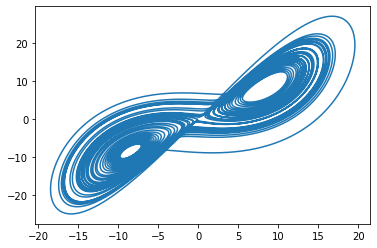

In [79]:
import matplotlib.pyplot as plt
plt.plot(x,y)

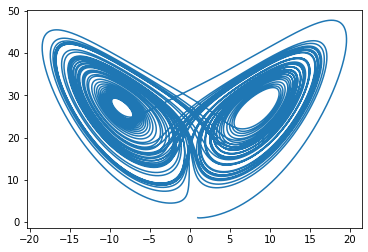

In [83]:
plt.plot(x,z)

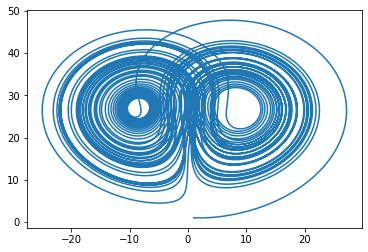

In [84]:
plt.plot(y,z)

In [74]:
import numpy as np
import pandas as pd 

import bokeh_catplot

import bokeh.plotting
import bokeh.io

bokeh.io.output_notebook()

Loading BokehJS ...

In [78]:
p = bokeh.plotting.figure(
    height = 300,
    width = 500,
    x_axis_label = 'x',
    y_axis_label = 'y'
)

p.line(
    x=x,
    y=y
)

bokeh.io.show(p)